# Import the libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier

import warnings
warnings.filterwarnings('ignore')

# Create a Classification dataset

In [14]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

# Scatter Plot of the data

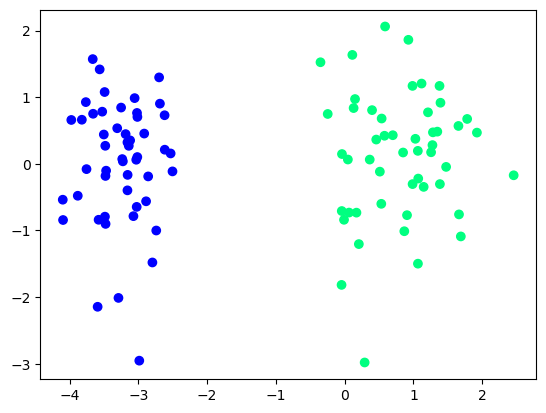

In [16]:
plt.scatter(X[:,0], X[:,1],c=y, cmap='winter');

# Using Sklearn's Logistic Regression

In [17]:
lor = LogisticRegression(penalty=None, solver='sag')

## Fit the model

In [18]:
lor.fit(X, y)

LogisticRegression(penalty=None, solver='sag')

## Coefficients and Intercept

In [19]:
print(f'Intercept: ', lor.intercept_)
print(f'Coefficients: ', lor.coef_)

Intercept:  [5.84818011]
Coefficients:  [[4.86008416 0.22179387]]


In [20]:
# aX + bY + c = 0 => y = (-a/b)X + (-c/b)
m1 = - (lor.coef_[0][0] / lor.coef_[0][1])
b1 = - (lor.intercept_ / lor.coef_[0][1])

In [21]:
x_input = np.linspace(-3,3,100)
y_input = m1 * x_input + b1

# Using Batch Gradient Descent

In [26]:
class MyLOR:

    def __init__(self, lr, epochs=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        
        # Add 1 before X (insert 1's at 0th index in X_train)
        X = np.insert(X, 0, 1, axis=1)

        # Initialize the coefficents/weights matrix with zeros
        betas = np.ones(X.shape[1])

        for i in range(self.epochs):

            # y_hat = sigmoid(summation of Xi and beta i)
            y_hat = self.sigmoid(np.dot(X, betas))

            # Calculate the update term
            betas = betas + self.lr * (np.dot((y - y_hat), X) / X.shape[0])

            # Calculate Intercept and coefficents
            self.intercept_ = betas[0]
            self.coef_ = betas[1:]

    def predict(self, X):
        y_pred = np.dot(X, self.coef_) + self.intercept_
        return y_pred

## Fit the model

In [27]:
mylor = MyLOR(lr=0.5, epochs=1000)

In [28]:
mylor.fit(X, y)

## Coefficients and Intercept

In [29]:
print(f'Intercept: ', mylor.intercept_)
print(f'Coefficients: ', mylor.coef_)

Intercept:  4.2684411151958175
Coefficients:  [3.76718284 0.12934682]


In [30]:
m2 = - (mylor.coef_[0] / mylor.coef_[1])
b2 = - (mylor.intercept_ / mylor.coef_[1])

In [31]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m2 * x_input1 + b2

(-3.0, 2.0)

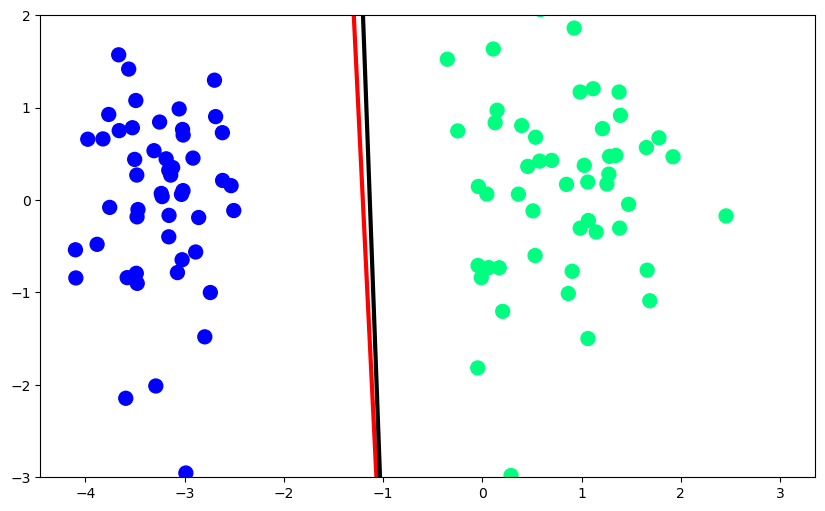

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y,cmap='winter', s=100)
plt.ylim(-3,2)

# Using SGDClassifier

In [54]:
sgd = SGDClassifier(loss='log_loss', penalty=None, max_iter=5000, eta0=0.5, learning_rate='constant', random_state=42)

## Fit the model

In [55]:
sgd.fit(X, y)

SGDClassifier(eta0=0.5, learning_rate='constant', loss='log_loss',
              max_iter=5000, penalty=None, random_state=42)

## Coefficients and Intercept

In [56]:
print(f'Intercept: ', sgd.intercept_)
print(f'Coefficients: ', sgd.coef_)

Intercept:  [4.27121673]
Coefficients:  [[3.77016743 0.12202923]]


In [57]:
# aX + bY + c = 0 => y = (-a/b)X + (-c/b)
m3 = - (sgd.coef_[0][0] / sgd.coef_[0][1])
b3 = - (sgd.intercept_ / sgd.coef_[0][1])

In [58]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m2 * x_input2 + b2

# Decision Boundary - Logistic Regression, Batch Gradient Descent, SGDClassfier

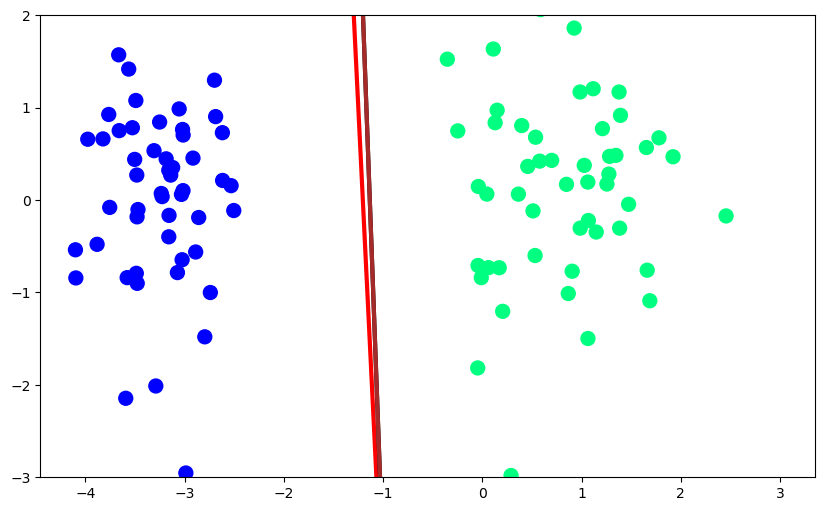

In [59]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3) # Logistic Regression
plt.plot(x_input1, y_input1, color='black', linewidth=3) # Gradient Descent
plt.plot(x_input2, y_input2, color='brown', linewidth=3) # SGDClassifier
plt.scatter(X[:,0], X[:,1], c=y,cmap='winter', s=100) 
plt.ylim(-3,2);

# Logistic Regression vs SGDClassifier

| Feature                   | `LogisticRegression`                                    | `SGDClassifier`                                 |
| ------------------------- | ------------------------------------------------------- | ----------------------------------------------- |
| **Purpose**               | Logistic Regression only                                | Any linear model with SGD (logistic, SVM, etc.) |
| **Optimization**          | Quasi-Newton, coordinate descent, or stochastic solvers | Pure stochastic gradient descent                |
| **Learning Rate Control** | Minimal (hidden inside solver)                          | Full control over learning rate & schedule      |
| **Batch vs Online**       | Batch learning                                          | Supports online (`partial_fit`)                 |
| **Speed**                 | Good for small/medium datasets                          | Excellent for very large datasets               |
| **Regularization**        | L1, L2, ElasticNet (depends on solver)                  | L1, L2, ElasticNet                              |
| **Probabilities**         | Yes (`predict_proba`)                                   | Yes (`predict_proba`) with `loss='log_loss'`    |


**Rule of Thumb:**
* Use `LogisticRegression` if:
    * You have small-to-medium datasets.
    * You want robust, out-of-the-box optimization without tuning learning rates.
    * You want multinomial logistic regression.

* Use `SGDClassifier` if:
    * You have very large datasets or streaming data.
    * You want manual control over learning rates, iterations, and updates.
    * You plan to use online learning.

* I'll implement Stochastic and Mini-Batch once I complete Logistic Regression.